<a href="https://colab.research.google.com/github/shintafiaa/Kampus-Merdeka-Pengembangan-ML/blob/main/Kampus_Merdeka_Proyek_2_Time_Series_(9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shinta Roudlotu Hanafia

Submission ke-2 Modul Pengembangan ML pada Dicoding Course

LSTM-Time Series-Weather
File submisi proyek ke-2 modul Pengembangan Machine Learning mengenai LSTM-Time Series, temperature changes. 

shintafiaa@gmail.com

2 Oktober 2021

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [ ]:
df = pd.read_csv('weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
df_train =  df.loc[:2553,['Formatted Date', 'Temperature (C)']]
df_val =  df.loc[2554:3191,['Formatted Date', 'Temperature (C)']]

In [ ]:
df_train

,Formatted Date,Temperature (C)
0,2006-04-01 00:00:00.000 +0200,9.472222
1,2006-04-01 01:00:00.000 +0200,9.355556
2,2006-04-01 02:00:00.000 +0200,9.377778
3,2006-04-01 03:00:00.000 +0200,8.288889
4,2006-04-01 04:00:00.000 +0200,8.755556
...,...,...
2549,2006-02-22 05:00:00.000 +0100,5.022222
2550,2006-02-22 06:00:00.000 +0100,4.950000
2551,2006-02-22 07:00:00.000 +0100,4.083333
2552,2006-02-22 08:00:00.000 +0100,4.927778


In [ ]:
df_train.isnull().sum()

Formatted Date     0
Temperature (C)    0
dtype: int64

In [ ]:
df_val

,Formatted Date,Temperature (C)
2554,2006-02-22 10:00:00.000 +0100,7.027778
2555,2006-02-22 11:00:00.000 +0100,7.644444
2556,2006-02-22 12:00:00.000 +0100,7.622222
2557,2006-02-22 13:00:00.000 +0100,7.711111
2558,2006-02-22 14:00:00.000 +0100,7.666667
...,...,...
3187,2006-01-20 19:00:00.000 +0100,-1.027778
3188,2006-01-20 20:00:00.000 +0100,-1.088889
3189,2006-01-20 21:00:00.000 +0100,-1.111111
3190,2006-01-20 22:00:00.000 +0100,-1.044444


In [ ]:
df_val.isnull().sum()

Formatted Date     0
Temperature (C)    0
dtype: int64

In [ ]:
pip install sklearn

In [ ]:
X=df['Formatted Date']
y=df['Temperature (C)']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,shuffle=False)

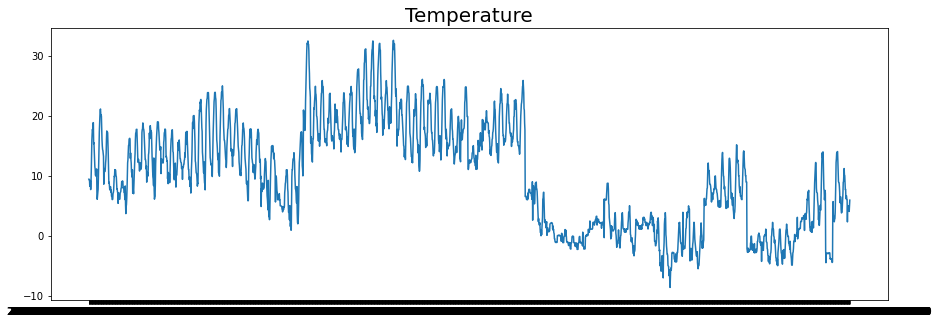

In [ ]:
dates = df_train['Formatted Date'].values
temp  = df_train['Temperature (C)'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title("Temperature",
          fontsize=20);

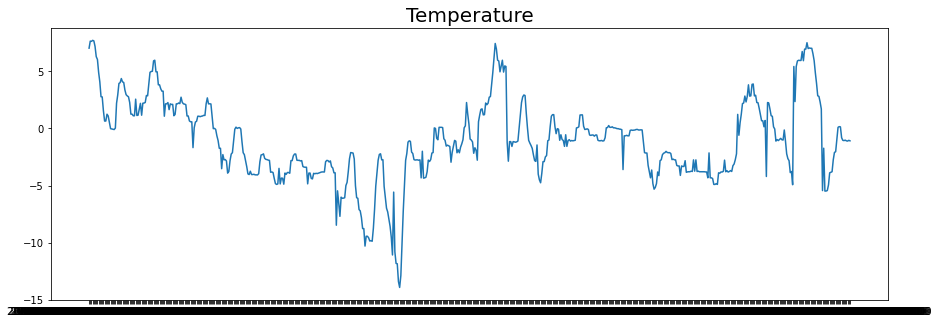

In [ ]:
dates = df_val['Formatted Date'].values
temp  = df_val['Temperature (C)'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title("Temperature",
          fontsize=20);

In [ ]:
#menerima sebuah series/atribut kita yang telah dikonversi menjadi tipe numpy, lalu mengembalikan label dan atribut dari dataset dalam bentuk batch
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
#2 buah layer LSTM
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1)
])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.09):
      print("\MAE model telah mencapai < 10%! ")
      self.model.stop_training = True
callbacks = myCallback()

In [33]:
#pada optimizer, kita akan menggunakan parameter learning rate dan momentum
#Loss function Huber
#metrik evaluasi model MAE
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-08, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=10000, callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Streaming output truncated to the last 5000 lines.
6/6 [==============================] - 1s 118ms/step - loss: 0.6743 - mae: 1.0347
Epoch 7502/10000
6/6 [==============================] - 1s 115ms/step - loss: 0.7215 - mae: 1.0904
Epoch 7503/10000
6/6 [==============================] - 1s 112ms/step - loss: 0.6816 - mae: 1.0422
Epoch 7504/10000
6/6 [==============================] - 1s 129ms/step - loss: 0.7321 - mae: 1.1007
Epoch 7505/10000
6/6 [==============================] - 1s 122ms/step - loss: 0.7124 - mae: 1.0856
Epoch 7506/10000
6/6 [==============================] - 1s 117ms/step - loss: 0.7954 - mae: 1.1651
Epoch 7507/10000
6/6 [==============================] - 1s 112ms/step - loss: 0.7612 - mae: 1.1296
Epoch 7508/10000
6/6 [==============================] - 1s 110ms/step - loss: 0.7215 - mae: 1.0914
Epoch 7509/10000
6/6 [==============================] - 1s 111ms/step - loss: 0.7116 - mae: 1.0732
Epoch 7510/10000
6/6 [==============================] - 1s 125ms/step - los

In [43]:
#mae yang harus dicapai
minMae = (max(y) - min(y)) * 10/100
minMae
#mae yang telah dicapai 1.1236

6.172777777777777

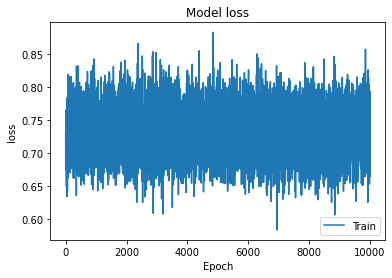

In [41]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

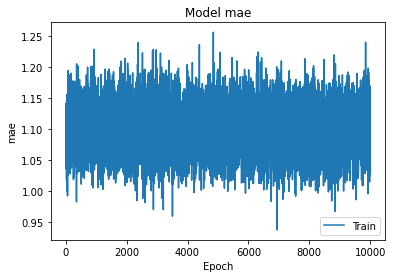

In [44]:
plt.plot(history.history['mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()